<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week03-MLR/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate linear regresion


In [1]:
!pip install ipython-autotime
%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 432 µs (started: 2024-08-27 07:34:23 +00:00)


## 1.1 Normal equation (Numpy version)

theta =  [ 7. 15. -6.]
y predict =  [13.]
data =  [(0, 1), (2, 1), (3, 4)]


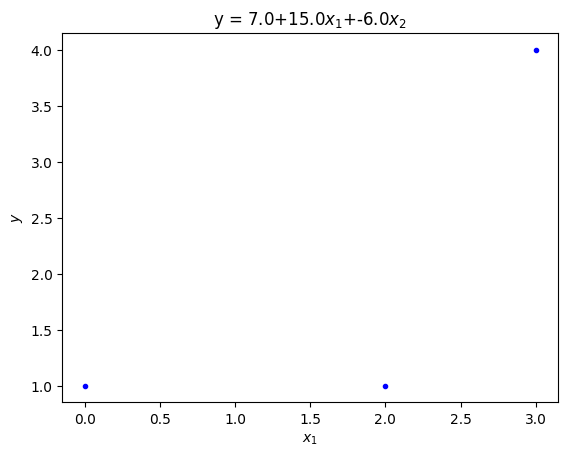

time: 2.88 s (started: 2024-08-27 07:34:23 +00:00)


In [2]:
import numpy as np
np.set_printoptions(precision=2)
from sklearn.datasets import make_regression

#x, y = make_regression(n_samples=10, n_features=2, noise=2, random_state=123)
#x = np.array([[0,2,3],[1,6,8]]).T
x = np.array([[0,1],[2,6],[3,8]]) #x1, x2
y = np.array([1,1,4])

x_b = np.c_[np.ones((x.shape[0],1)),x]

#call inverse function from linear algebra module
theta = np.linalg.pinv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta)

#predict trainned x
xtest = np.array([[4,9]])
xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
y_p = xtest_b.dot(theta)
print("y predict = ",y_p)

import matplotlib.pyplot as plt

#Create the title
exp = ""
plus = "+"
for t in range(len(theta)):
  if t == len(theta)-1:
    plus = ""
  if t == 0:
    xterm = ""
  else:
    xterm = r"$x_"+str(t)+"$"
  exp += str(np.round(theta[t],2)) + xterm + plus
#end create the title

plt.title("y = "+exp)
data = sorted(zip(x[:,0],y))
print("data = ", data)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val, y_val, "b.")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')

plt.show()


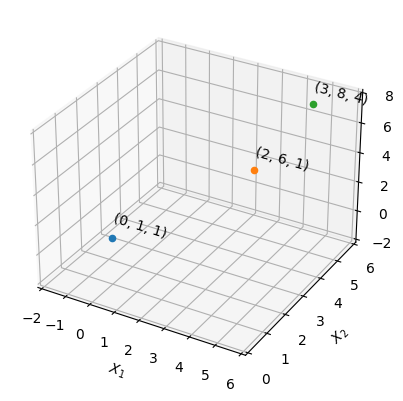

time: 490 ms (started: 2024-08-27 07:34:26 +00:00)


In [3]:
ax = plt.figure().add_subplot(projection='3d')

xs = x[:,0]
ys = x[:,1]
zs = y

for x1, x2, _y in zip(xs, ys, zs):
  label = '(%d, %d, %d)' % (x1, x2, _y)
  ax.text(x1, x2, _y, label, 'x')
  ax.scatter(x1, x2, zs=_y)

ax.set_xlim(-2, 6)
ax.set_ylim(0, 6)
ax.set_zlim(-2, 8)
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_zlabel('Y')

plt.show()

Exercise1 <br>
1.1 Change a number of features to 4 (x1,x2,x3,x4) </br>


# **Sklearn**

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)

#prediction
y_p = lin_reg.predict(xtest)
print("y predict = ",y_p)

6.999999999999989  ,  [15. -6.]
y predict =  [13.]
time: 356 ms (started: 2024-08-27 07:34:27 +00:00)


# **Batch Gradient descent (Multiple linear regression)**


In [5]:
def cost_function(theta, x, y, N):
  y_hat = x.dot(theta)
  c = (1/N)*np.sum((y_hat-y)**2)
  return c

time: 9.73 ms (started: 2024-08-27 07:34:27 +00:00)


In [6]:
def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
  converged = False
  iter = 0
  N = x.shape[0] # number of samples
  print("Num of data = ",N)

  # initial theta
  theta =  np.random.random((x.shape[1],1))
  print("Init theta.shape = ",theta.shape)

  # total error, J(theta)
  J = cost_function(theta, x, y, N)
  print("First J = ",J)

  # Iterate Loop
  while not converged:

    y_hat = x.dot(theta)
    diff = y_hat - y
    grad = x.T.dot(diff)

    theta = theta - alpha * (1/N) * (grad)

    assert theta.shape == (3,1) #This line makes sure that the shape of theta is still be the same.

    # error
    J2 = cost_function(theta, x, y, N)

    if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True

    J = J2   # update error s
    iter += 1  # update iter

    if iter == max_iter:
        print('       Max iterations exceeded!')
        converged = True

  #print("End converged iter = ",iter)
  return theta

time: 14.1 ms (started: 2024-08-27 07:34:27 +00:00)


In [7]:
if __name__ == '__main__':

  print("start main")
  print(x_b.shape)
  y = y.reshape(-1,1)
  print(y.shape)

  alpha = 0.01 # learning rate
  #Training process
  theta = gradient_descent(alpha, x_b, y, ep=0.000000000001, max_iter=1000000)
  print ("Theta = ", theta)

  #predict trainned x
  xtest = np.array([[4,9]])
  xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
  y_p = xtest_b.dot(theta)
  print("y predict = ",y_p)



start main
(3, 3)
(3, 1)
Num of data =  3
Init theta.shape =  (3, 1)
First J =  0.6079854015936161
       Converged, iterations:  277391 / 1000000
Theta =  [[ 7.]
 [15.]
 [-6.]]
y predict =  [[13.]]
time: 15.1 s (started: 2024-08-27 07:34:27 +00:00)


# Stochastic GD
## Your turn :)

# Mini-batch GD (size = 2)
## Your turn :)

# Polynomial regression
Reference: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week03-MLR/Position_Salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
time: 3.1 s (started: 2024-08-27 07:34:42 +00:00)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


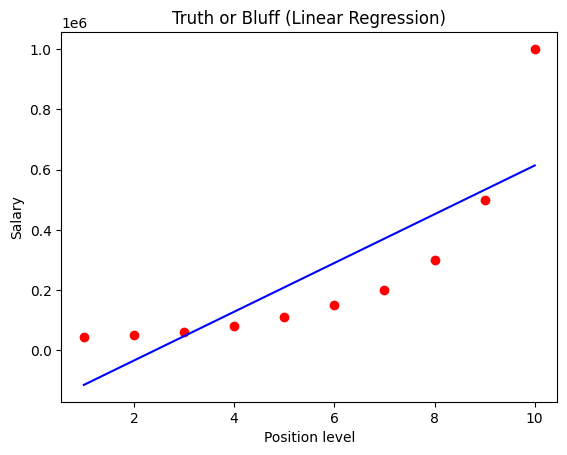

time: 1.26 s (started: 2024-08-27 07:34:46 +00:00)


In [9]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(y)
# Visualizing the Linear Regression results

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


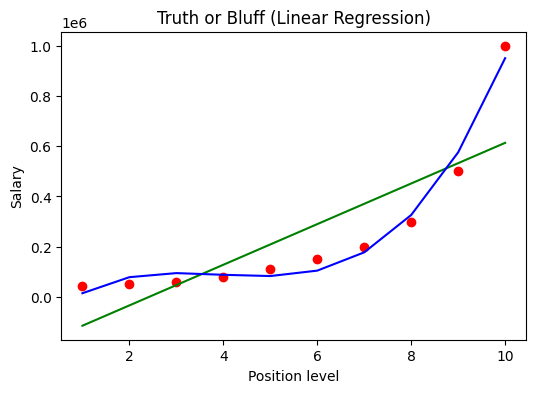

time: 619 ms (started: 2024-08-27 08:04:00 +00:00)


In [15]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
print(X_poly)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='green')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [16]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[5.5]])))

[249500.]
[89187.5]
time: 5.56 ms (started: 2024-08-27 08:04:09 +00:00)
